# Detects a piece of image in an image

In [ ]:
!pip install numpy matplotlib opencv-python

In [70]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from enum import Enum

In [3]:
game_img = cv.imread('../data/mario_game.png', cv.IMREAD_UNCHANGED)
template_img = cv.imread('../data/superBox.png', cv.IMREAD_UNCHANGED)

In [62]:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

In [71]:
class DebugMode(Enum):
    NONE = 0
    RECTANGLE = 1
    MARKER = 2

In [5]:
def imgShow(img):
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()

In [7]:
def getRectangle(location, template):
    needle_w = template.shape[1]
    needle_h = template.shape[0]
    return [location[0], location[1], needle_w, needle_h]

In [87]:
def getDotFromRectangle(rectangle):
    x,y,w,h = rectangle
    center_x = x + int(w/2)
    center_y = y + int(h/2)

    return (center_x, center_y)

In [88]:
def drawRectangle(image, rectangle, line_color):
    line_type = cv.LINE_4
    
    x,y,w,h = rectangle
    top_left = (x, y)
    bottom_right = (x + w, y + h)
    
    cv.rectangle(image, top_left, bottom_right, line_color, line_type)

In [89]:
def drawMarker(image, dot, marker_color):
    marker_type = cv.MARKER_CROSS
    
    cv.drawMarker(image, dot, marker_color, marker_type)

In [122]:
def findPositions(image, template, methodStr, threshold=0.5, debug_mode=DebugMode.NONE, color=(0,255,0)):
    method = eval(methodStr)
        
    result = cv.matchTemplate(image, template, method)
    locations = np.where(result >= threshold)
    locations = list(zip(*locations[::-1]))
    
    rectangles = []
    for location in locations:
        rectangles.append(getRectangle(location, template))
        rectangles.append(getRectangle(location, template))
    
    rectangles, weights = cv.groupRectangles(rectangles, 1, 0.5)
    
    dots = []    
    if len(rectangles) :
        for rectangle in rectangles:
            dot = getDotFromRectangle(rectangle)
            dots.append(dot)
            
            if debug_mode == DebugMode.RECTANGLE :
                drawRectangle(image, rectangle, color)   
            elif debug_mode == DebugMode.MARKER :
                drawMarker(image, dot, color)
                
    if debug_mode != DebugMode.NONE :
        imgShow(image)
        
    return dots

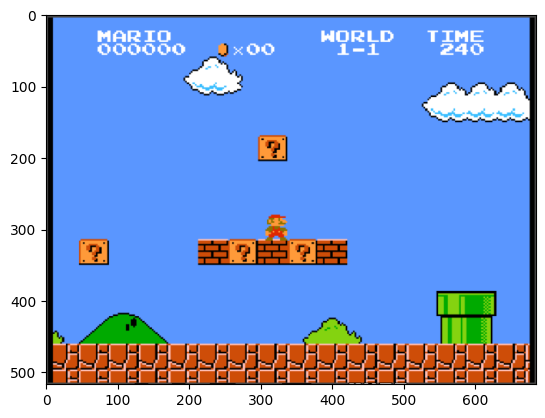

In [123]:
imgShow(game_img)

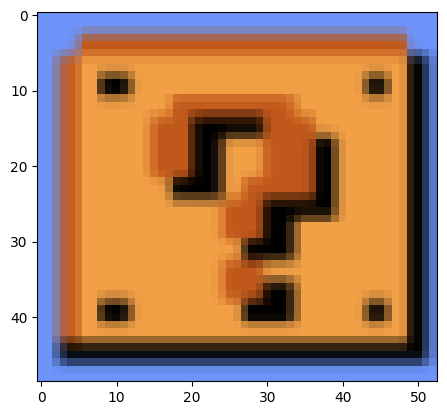

In [124]:
imgShow(template_img)

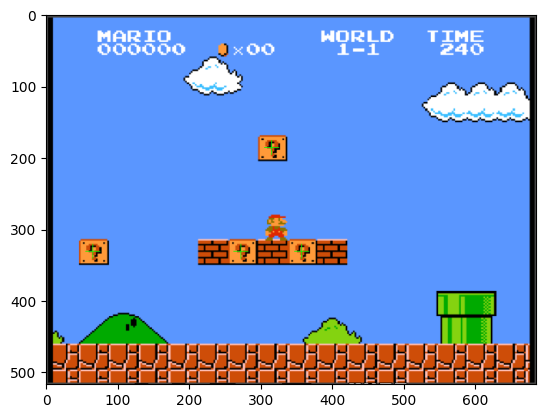

[(315, 186), (65, 331), (272, 331), (357, 331)]

In [134]:
gameImgCopy = game_img.copy()
findPositions(gameImgCopy, template_img, "cv.TM_CCORR_NORMED", 0.91, DebugMode.MARKER, (0,255,0))